In [1]:
import pandas as pd
from pandas import DataFrame
from numpy import random

# Example 1: Tufte Style Box+Whiskers

In [2]:
df = DataFrame(random.normal(5, 1, size=(25,8)), columns=list("ABCDEFGH"))
df

,A,B,C,D,E,F,G,H
0,5.816951,4.354197,5.014316,4.944332,5.268459,4.127929,4.495678,6.285195
1,5.140925,5.384016,4.585007,5.698897,3.753989,4.385816,5.595906,5.910020
2,3.973697,4.270081,5.344023,6.379101,6.241163,4.133344,6.699746,3.925451
3,5.723197,5.890564,4.528252,6.288667,4.873346,5.236624,5.074247,5.054928
4,5.319266,4.843160,5.366703,4.274235,3.926008,4.957835,7.711974,4.995974
5,4.795188,5.731934,3.759910,4.874946,3.977707,4.284435,5.820949,6.194236
6,6.130495,1.754058,4.924919,5.250145,5.244639,5.101537,6.141814,5.193609
7,5.104017,5.400567,4.318200,4.306453,6.280427,6.555387,6.585680,4.189265
8,6.030186,5.208992,4.528060,5.024145,4.610665,3.610316,3.984090,4.892341
9,4.961964,5.812331,3.388120,6.822580,5.383096,2.459424,6.806711,5.510672


In [3]:
df.mean(axis=0)

A    5.039220
B    4.961633
C    4.790568
D    4.950532
E    4.905931
F    4.778803
G    5.569445
H    4.901587
dtype: float64

In [4]:
import matplotlib
from matplotlib import pyplot as plt

In [5]:
%matplotlib inline

In [6]:
matplotlib.rcParams["font.size"] = 16

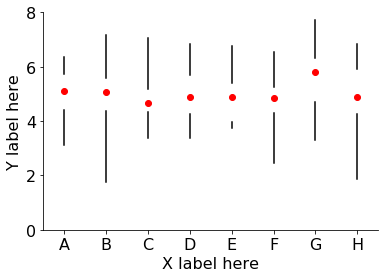

In [7]:
ax = plt.subplots()[1]
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("X label here")
plt.ylabel("Y label here")

ax.set_xlim(0.5, len(df.columns)+0.5)
ax.set_ylim(0, 8)
ax.set_xticklabels(list(df.columns))
ax.set_xticks(range(1, len(df.columns)+1))

for i, col in enumerate(df.columns):
    s = df[col]
    
    # mean
    x = i+1
    y = s.quantile(0.5)
    ax.plot(x, y, 'ro')
    
    y1 = s.quantile(0.75)
    y2 = s.quantile(1)
    ax.plot((x, x), (y1, y2), 'k')
    
    y1 = s.quantile(0)
    y2 = s.quantile(0.25)
    ax.plot((x, x), (y1, y2), 'k')

# Example 2: Std Dev Ranges

In [8]:
dfs = []

for i in range(5):
    df = DataFrame()
    df["x"] = list(range(4))
    df["A"] = df["x"] + random.normal(size=4) * 0.2
    df["B"] = 2 + random.normal(size=4) * 0.3
    df["trial"] = i
    dfs.append(df)

In [9]:
df = pd.concat(dfs)
df

,x,A,B,trial
0,0,-0.250173,1.576447,0
1,1,1.061277,2.089403,0
2,2,1.668585,1.485925,0
3,3,2.769240,1.733016,0
0,0,0.025520,1.886120,1
1,1,1.267888,1.809673,1
2,2,2.083532,1.878483,1
3,3,2.870992,2.597568,1
0,0,0.296073,1.694059,2
1,1,1.188875,2.432131,2


In [10]:
df = df.set_index(["trial", "x"])
df

A         B
trial x                    
0     0 -0.250173  1.576447
      1  1.061277  2.089403
      2  1.668585  1.485925
      3  2.769240  1.733016
1     0  0.025520  1.886120
      1  1.267888  1.809673
      2  2.083532  1.878483
      3  2.870992  2.597568
2     0  0.296073  1.694059
      1  1.188875  2.432131
      2  2.036837  1.819796
      3  2.783269  2.108234
3     0 -0.004710  2.115809
      1  1.068703  1.467082
      2  2.193544  2.041147
      3  3.337262  1.778743
4     0 -0.233613  2.250526
      1  1.142650  1.996993
      2  1.748166  2.321381
      3  2.760914  2.105326

In [11]:
df.mean(axis=1)

trial  x
0      0    0.663137
       1    1.575340
       2    1.577255
       3    2.251128
1      0    0.955820
       1    1.538780
       2    1.981007
       3    2.734280
2      0    0.995066
       1    1.810503
       2    1.928317
       3    2.445751
3      0    1.055549
       1    1.267893
       2    2.117345
       3    2.558002
4      0    1.008456
       1    1.569822
       2    2.034773
       3    2.433120
dtype: float64

In [12]:
df.mean(axis=0)

A    1.490742
B    1.959393
dtype: float64

In [13]:
mean = df.mean(level=1)
mean

,A,B
x,,
0,-0.033381,1.904592
1,1.145879,1.959057
2,1.946133,1.909347
3,2.904335,2.064577


In [14]:
std = df.std(level=1)
std

,A,B
x,,
0,0.223564,0.281348
1,0.086398,0.355873
2,0.226131,0.306350
3,0.245975,0.346150


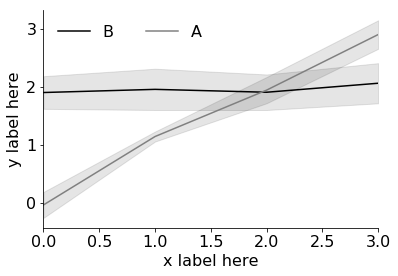

In [17]:
ax = None
colors = ["black", "gray"]
for col in reversed(df.columns):
    ax = mean[col].plot.line(color=colors.pop(0), ax=ax)
    plt.fill_between(mean.index, mean[col]-std[col], mean[col]+std[col],
                     color='black', alpha=0.1)
    
ax.legend(frameon=False, ncol=2)
ax.set_xlabel("x label here")
ax.set_ylabel("y label here")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)